In [91]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline
import math
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 


#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Models
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


#Metrics and Tuning
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']

plt.rc('figure', figsize=(12,8))
plt.rc('font', size=18)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


#General
import warnings
warnings.filterwarnings(action='ignore')

In [92]:
df = pd.read_csv('Life _Expectancy_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [24]:
df.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness 1-19 years   thinness 5-9 years  \
count           2904.000000          2904.000000   
mean               4.839704             4.870317   
std                4.420195             4.508882   
min                0.100000             0.100000   
25%                1.600000             1.500000   
50%                3.300000             3.300000   
75%                7.200000             7.200000   
max               27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [93]:
# Identify continuous and categorical variables
continuous_vars = ['Life expectancy','Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Diphtheria ',
                   ' HIV/AIDS','percentage expenditure', 'Total expenditure', 'GDP', ' thinness 1-19 years',' thinness 5-9 years', 'infant deaths', 'Schooling', 
                   'Population','under-five deaths ','Income composition of resources']

categorical_vars = ['Country','Year', 'Status']
def continuous_data_quality_report(data, continuous_vars):
    # Create an empty DataFrame to store the data quality report
    continuous_report = pd.DataFrame()

    for feature in continuous_vars:
        count = data[feature].count()
        missing_percentage = (data[feature].isnull().sum() / count) * 100
        cardinality = data[feature].nunique()
        min_value = data[feature].min()
        q1 = data[feature].quantile(0.25)
        median = data[feature].median()
        q3 = data[feature].quantile(0.75)
        max_value = data[feature].max()
        mean = data[feature].mean()
        std_dev = data[feature].std()

        # Append the results for the current feature to the continuous_report DataFrame
        feature_report = pd.DataFrame({
            'Feature': [feature],
            'Desc.': [''],  # Add a description if available
            'Count': [count],
            '% of Missing': [missing_percentage],
            'Card.': [cardinality],
            'Min.': [min_value],
            'Q1': [q1],
            'Median': [median],
            'Q3': [q3],
            'Max.': [max_value],
            'Mean': [mean],
            'Std. Dev.': [std_dev],
            'Notes': ['']
        })

        # Append the feature report to the continuous_report DataFrame
        continuous_report = pd.concat([continuous_report, feature_report], ignore_index=True)

    # Display the data quality report for continuous variables
    print("Continuous Variables Data Quality Report:")
    print(continuous_report)

    return continuous_report

# Function to generate a structured data quality report for categorical variables
def categorical_data_quality_report(data, categorical_vars):
    # Create an empty DataFrame to store the data quality report
    categorical_report = pd.DataFrame()

    for feature in categorical_vars:
        count = len(data)
        missing_percentage = (data[feature].isnull().sum() / count) * 100
        cardinality = data[feature].nunique()
        mode = data[feature].mode().iloc[0]
        mode_freq = data[feature].value_counts().max()
        mode_percentage = (mode_freq / count) * 100

        # Append the results for the current feature to the categorical_report DataFrame
        feature_report = pd.DataFrame({
            'Feature': [feature],
            'Desc.': [''],  # Add a description if available
            'Count': [count],
            '% of Missing': [missing_percentage],
            'Card.': [cardinality],
            'Mode': [mode],
            'Mode Freq.': [mode_freq],
            'Mode %': [mode_percentage],
            'Notes': ['']
        })

        # Append the feature report to the categorical_report DataFrame
        categorical_report = pd.concat([categorical_report, feature_report], ignore_index=True)

    # Display the data quality report for categorical variables
    print("\nCategorical Variables Data Quality Report:")
    print(categorical_report)

    return categorical_report
# Generate the data quality reports for continuous and categorical variables
continuous_report = continuous_data_quality_report(df, continuous_vars)
categorical_report = categorical_data_quality_report(df, categorical_vars)



Continuous Variables Data Quality Report:
                            Feature Desc.  Count  % of Missing  Card.  \
0                   Life expectancy         2928      0.341530    362   
1                   Adult Mortality         2928      0.341530    425   
2                           Alcohol         2744      7.069971   1076   
3                       Hepatitis B         2385     23.186583     87   
4                          Measles          2938      0.000000    958   
5                              BMI          2904      1.170799    608   
6                             Polio         2919      0.650908     73   
7                       Diphtheria          2919      0.650908     81   
8                          HIV/AIDS         2938      0.000000    200   
9            percentage expenditure         2938      0.000000   2328   
10                Total expenditure         2712      8.333333    818   
11                              GDP         2490     17.991968   2490   
12       

In [94]:
fig=px.violin(df,x='Status',y='Life expectancy',color='Status',template='plotly_white',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [95]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

In [96]:
#New dataframes
df_developed = df.loc[df['Status']=='Developed'].copy()
df_developing = df.loc[df['Status']=='Developing'].copy()

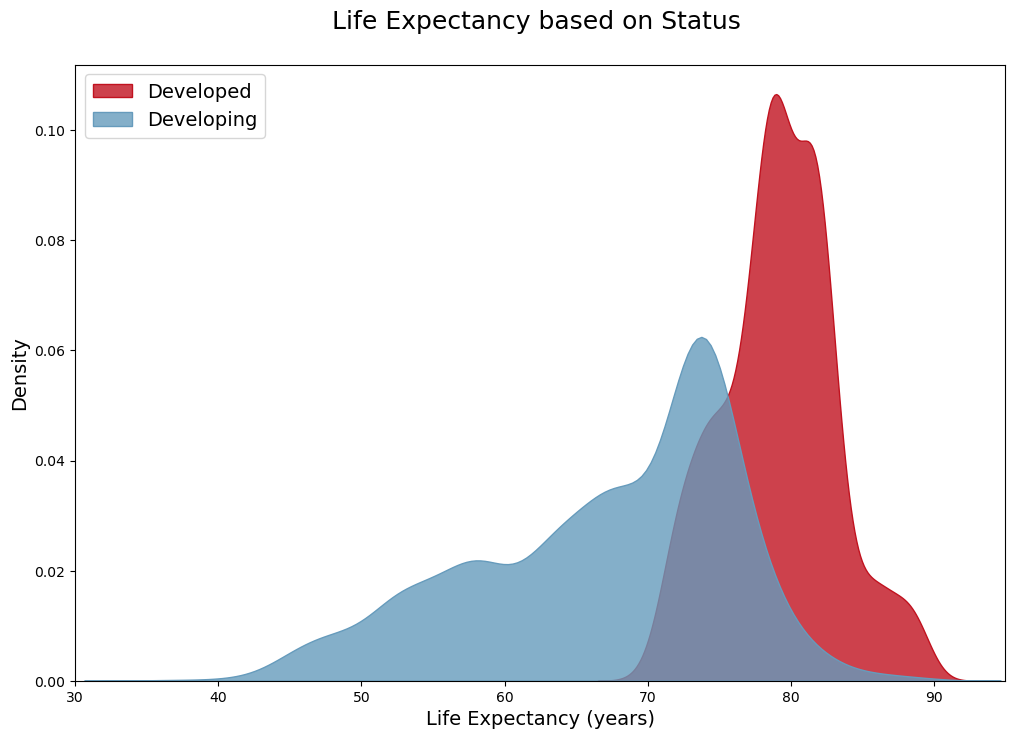

In [97]:
# Plot the density of life expectancy by country status
sns.kdeplot(df_developed['Life expectancy'],  # Plot the density of life expectancy for developed countries
            label='Developed',  # Label the developed countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[0],  # Set the color of the developed countries' density plot
            alpha = 0.8)  # Set the transparency of the developed countries' density plot

sns.kdeplot(df_developing['Life expectancy'],  # Plot the density of life expectancy for developing countries
            label='Developing',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[1],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot

plt.legend(loc='upper left')  # Add a legend to the plot
plt.ylabel('Density')  # Label the y-axis as "Density"
plt.xlim(30,95)  # Set the limits of the x-axis
plt.xlabel('Life Expectancy (years)')  # Label the x-axis as "Life Expectancy (years)"
plt.title('Life Expectancy based on Status \n', fontsize=18);  # Set the title of the plot

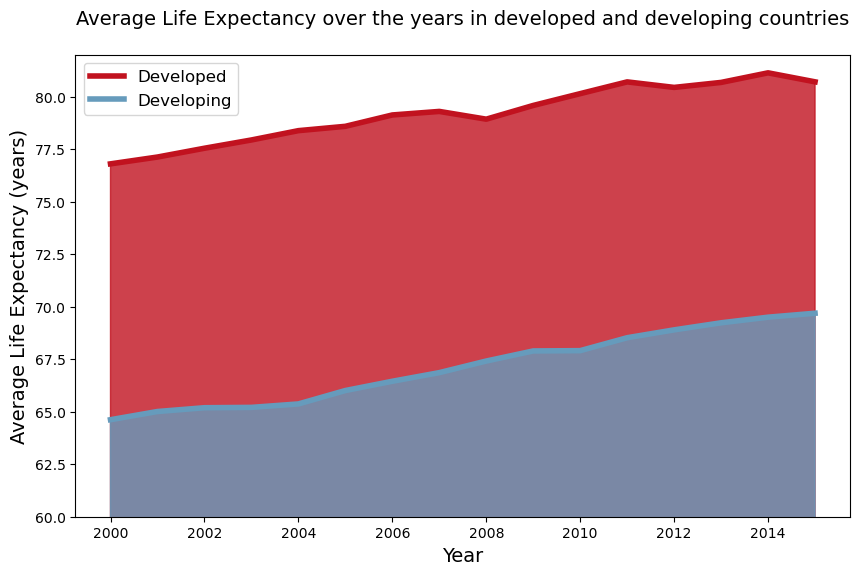

In [99]:
# Plot average Life Expectancy over the years
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df_developed.groupby('Year')['Life expectancy'].mean(),
       label='Developed',
       color=colors[0],
       linewidth=4)

# Fill area between the line plot and the x-axis
ax.fill_between(df_developed.groupby('Year')['Life expectancy'].mean().index,
                df_developed.groupby('Year')['Life expectancy'].mean().values,
                color=colors[0],
                alpha=0.8) 

ax.plot(df_developing.groupby('Year')['Life expectancy'].mean(),
       label='Developing',
       color=colors[1],
       linewidth=4,)

ax.fill_between(df_developing.groupby('Year')['Life expectancy'].mean().index,
                df_developing.groupby('Year')['Life expectancy'].mean().values,
                color=colors[1],
                alpha=0.8) 

plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Average Life Expectancy (years)')

# Set y-axis limits
ax.set_ylim(60,82)

ax.set_title('Average Life Expectancy over the years in developed and developing countries\n');

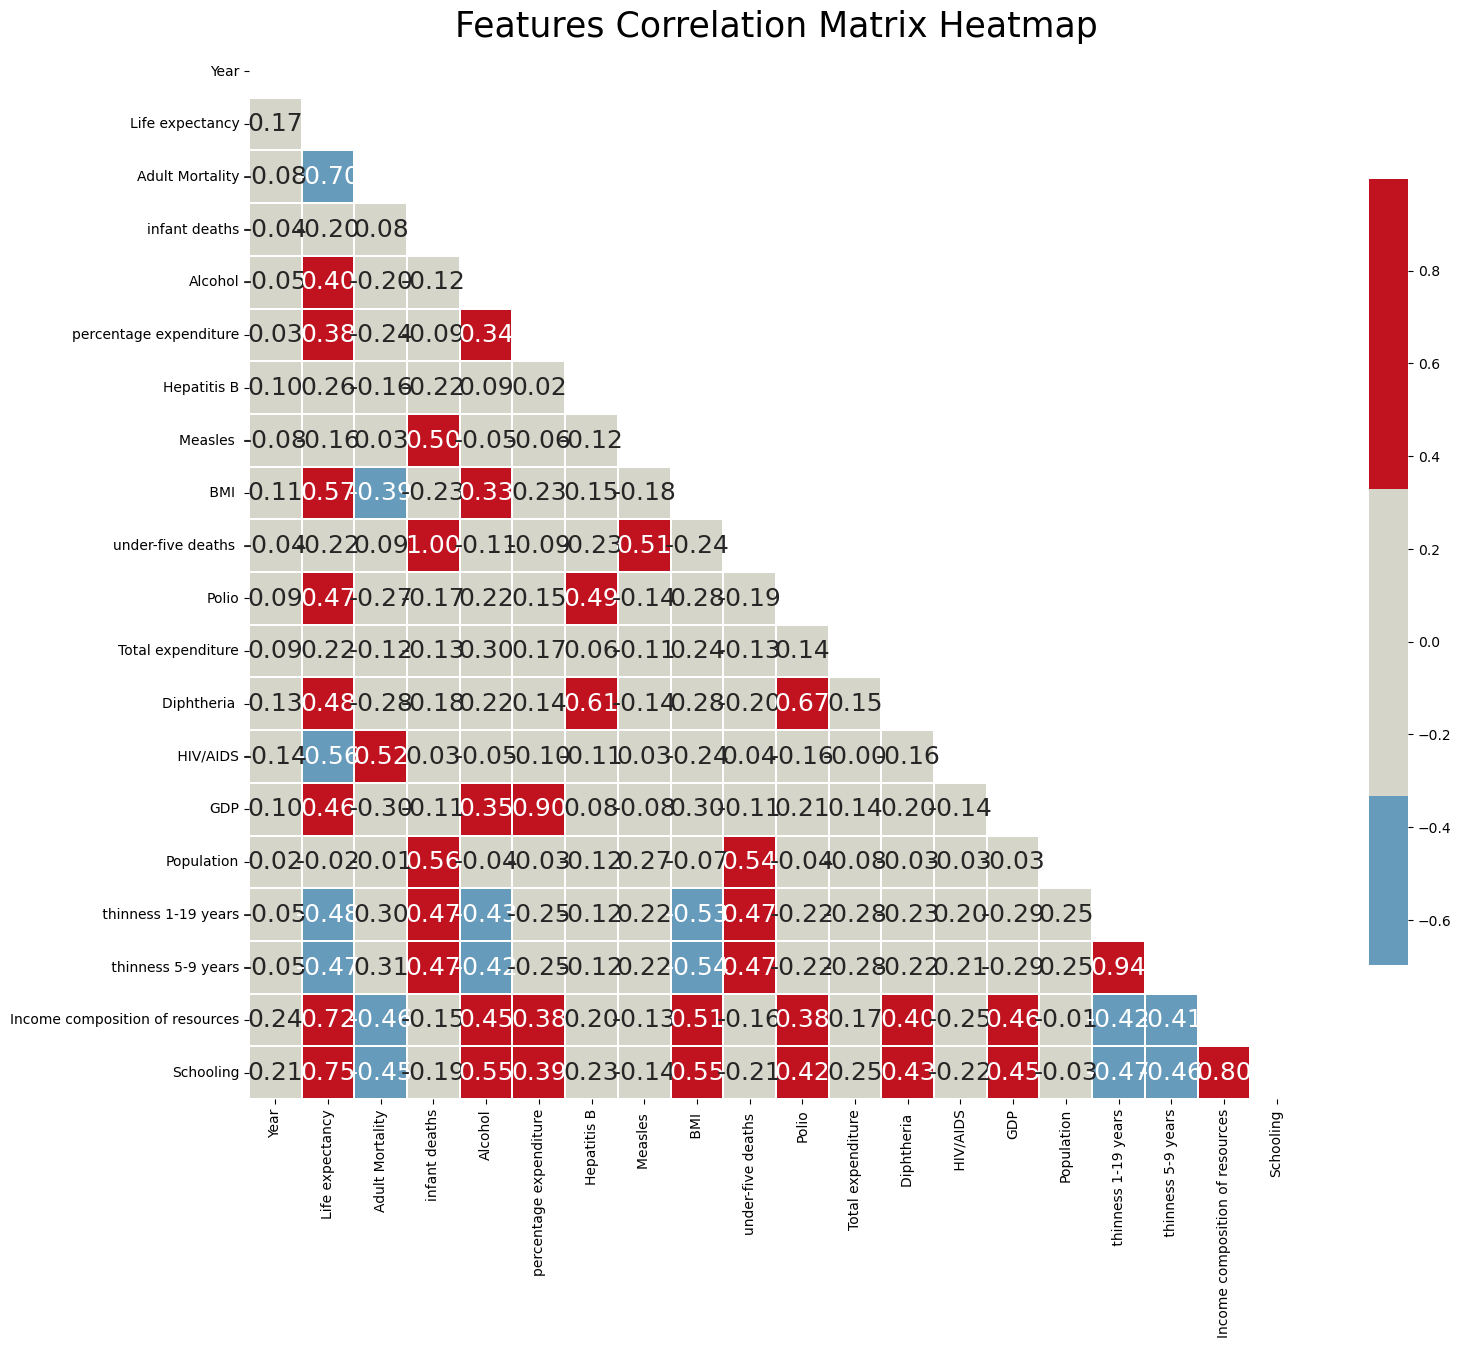

In [100]:
#Plot Matrix of Correlation
plt.figure(figsize=(17,17))

heatmap_colors = [colors[1], '#d6d5c9', colors[0]]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(df.corr(), 
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=heatmap_colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

plt.title('Features Correlation Matrix Heatmap', fontsize=25);

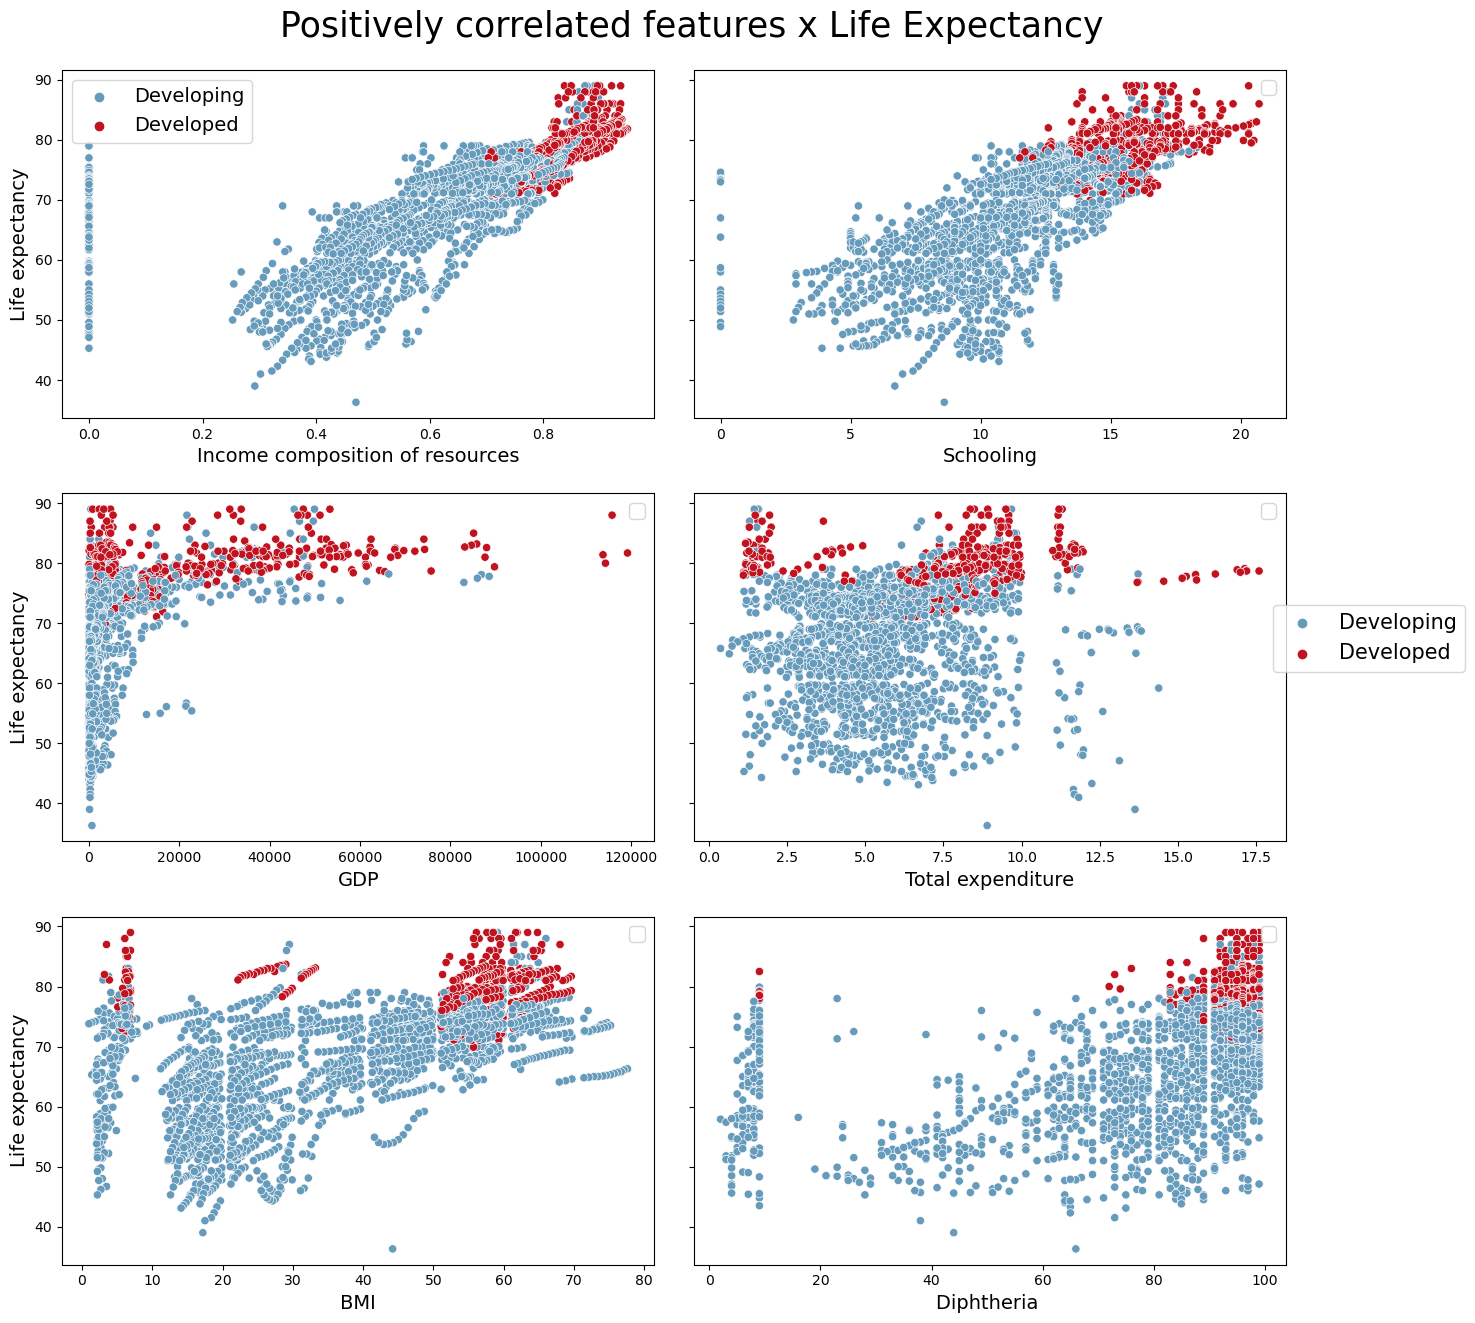

In [103]:
#Function to plot scatter plots
def plot_scatterplot(df, features, title = 'Features', columns = 2, x_lim=None):
    
    df = df.copy()
    
    rows = math.ceil(len(features)/2)

    fig, ax = plt.subplots(rows, columns, sharey = True, figsize = (14,14))
    
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i+1)
        sns.scatterplot(data = df,
                        x = feature,
                        y = 'Life expectancy',
                        hue = 'Status',
                        palette=[colors[1], colors[0]],
                        ax = ax)
        if (i == 0):
            ax.legend()
        else:
            ax.legend("")
        
    fig.legend(*ax.get_legend_handles_labels(), 
               loc='lower center', 
               bbox_to_anchor=(1.04, 0.5),
               fontsize='small')
    fig.suptitle('{} x Life Expectancy '.format(title), 
                 fontsize = 25, 
                 x = 0.56);

    fig.tight_layout(rect=[0.05, 0.03, 1, 1])
    
    
#Plot Life Expectancy x positively correlated features
pos_correlated_features = ['Income composition of resources', 'Schooling', 
                           'GDP', 'Total expenditure', 
                           ' BMI ', 'Diphtheria ']

title = 'Positively correlated features'

plot_scatterplot(df, pos_correlated_features, title)

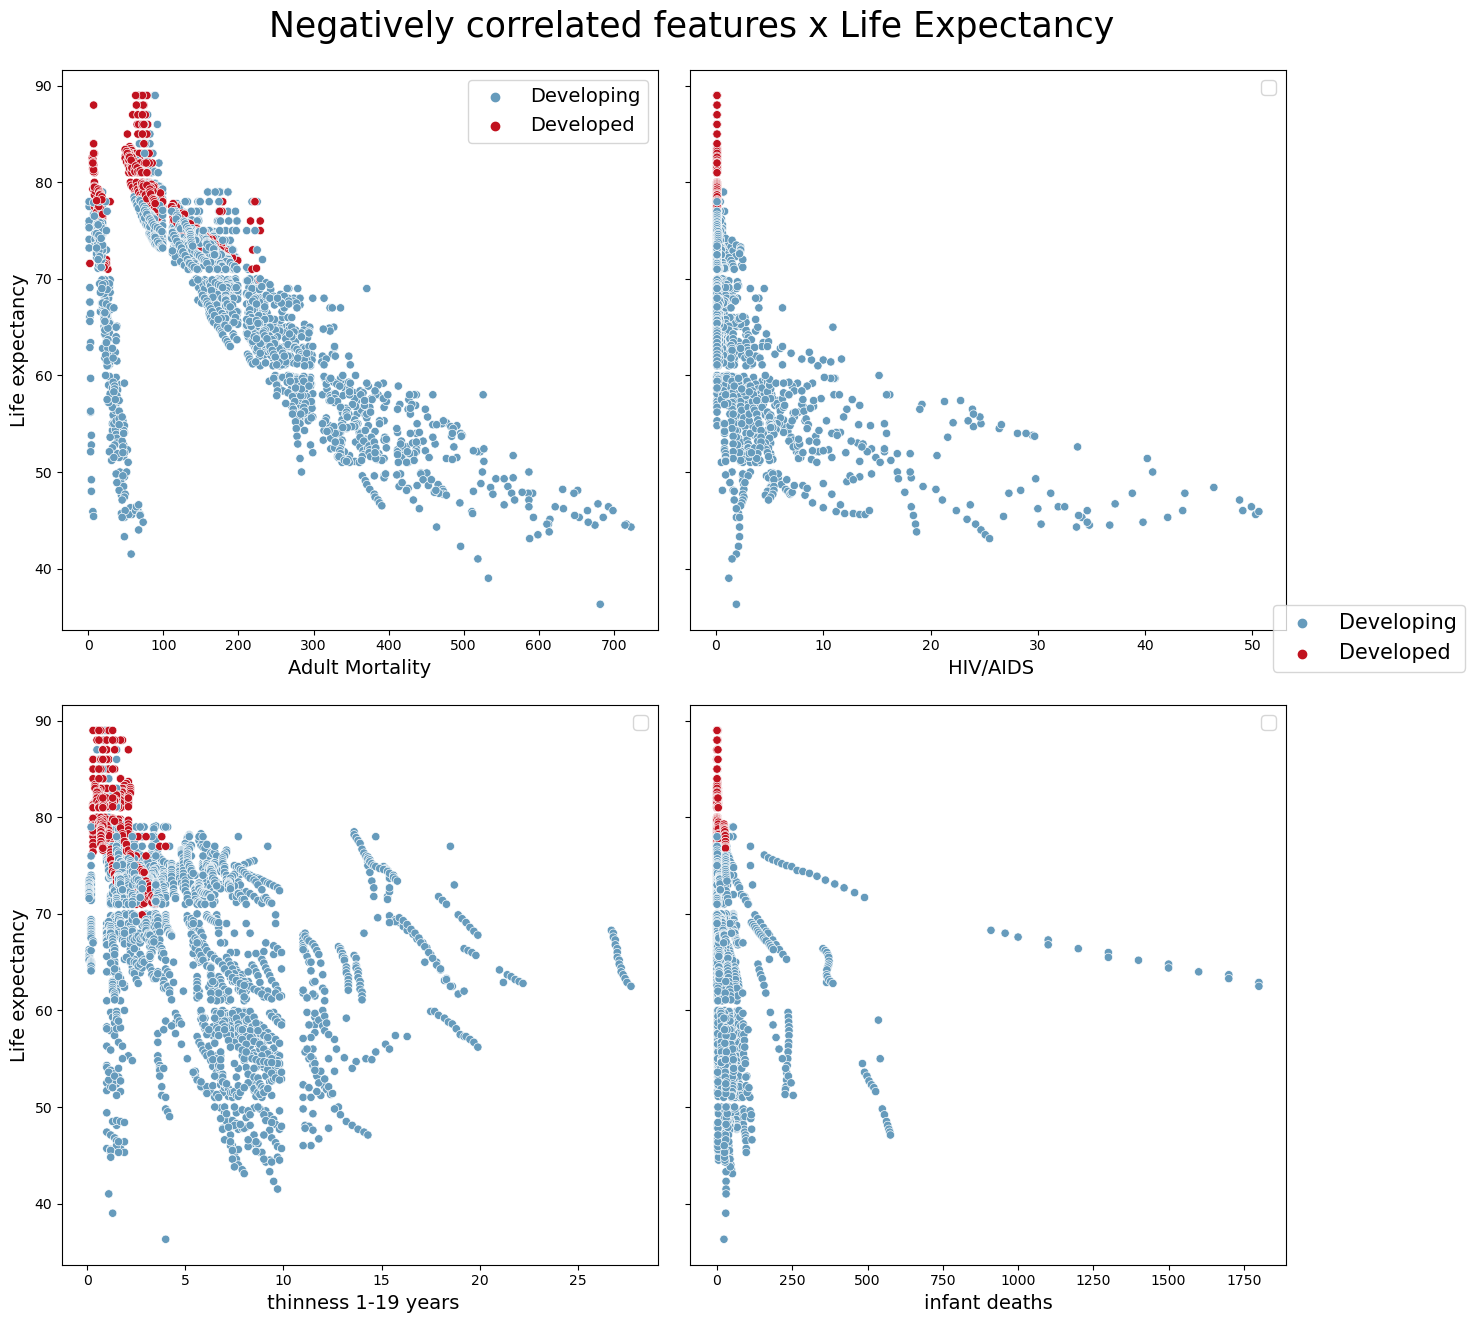

In [105]:
#Plot Life Expectancy x negatively correlated features
neg_correlated_features = ['Adult Mortality', ' HIV/AIDS', 
                           ' thinness 1-19 years', 'infant deaths']

title = 'Negatively correlated features'

plot_scatterplot(df, neg_correlated_features, title)

plt.savefig('life_expecatancy_scatter_neg.jpg')

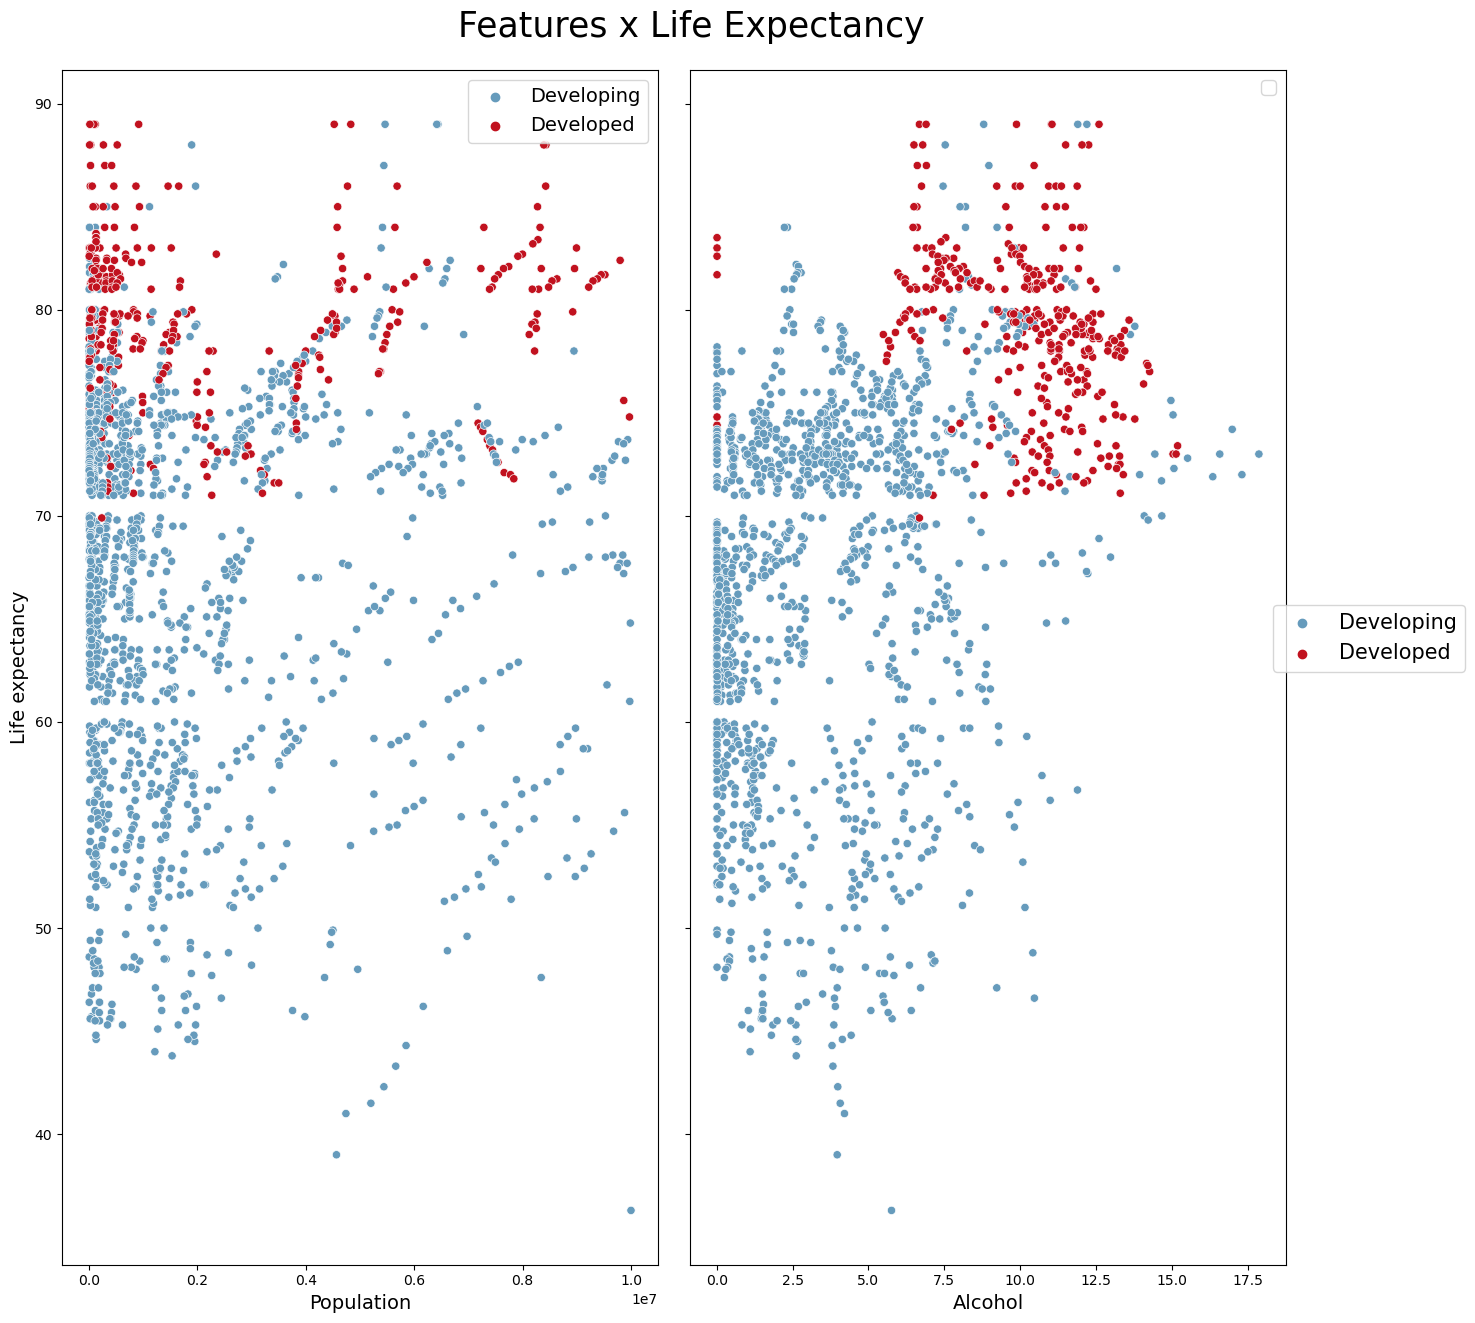

In [106]:
#Check other correlations
df_temp = df.loc[df['Population'] <= 1*1e7, :] 
features = ['Population', 'Alcohol']
plot_scatterplot(df_temp, features)

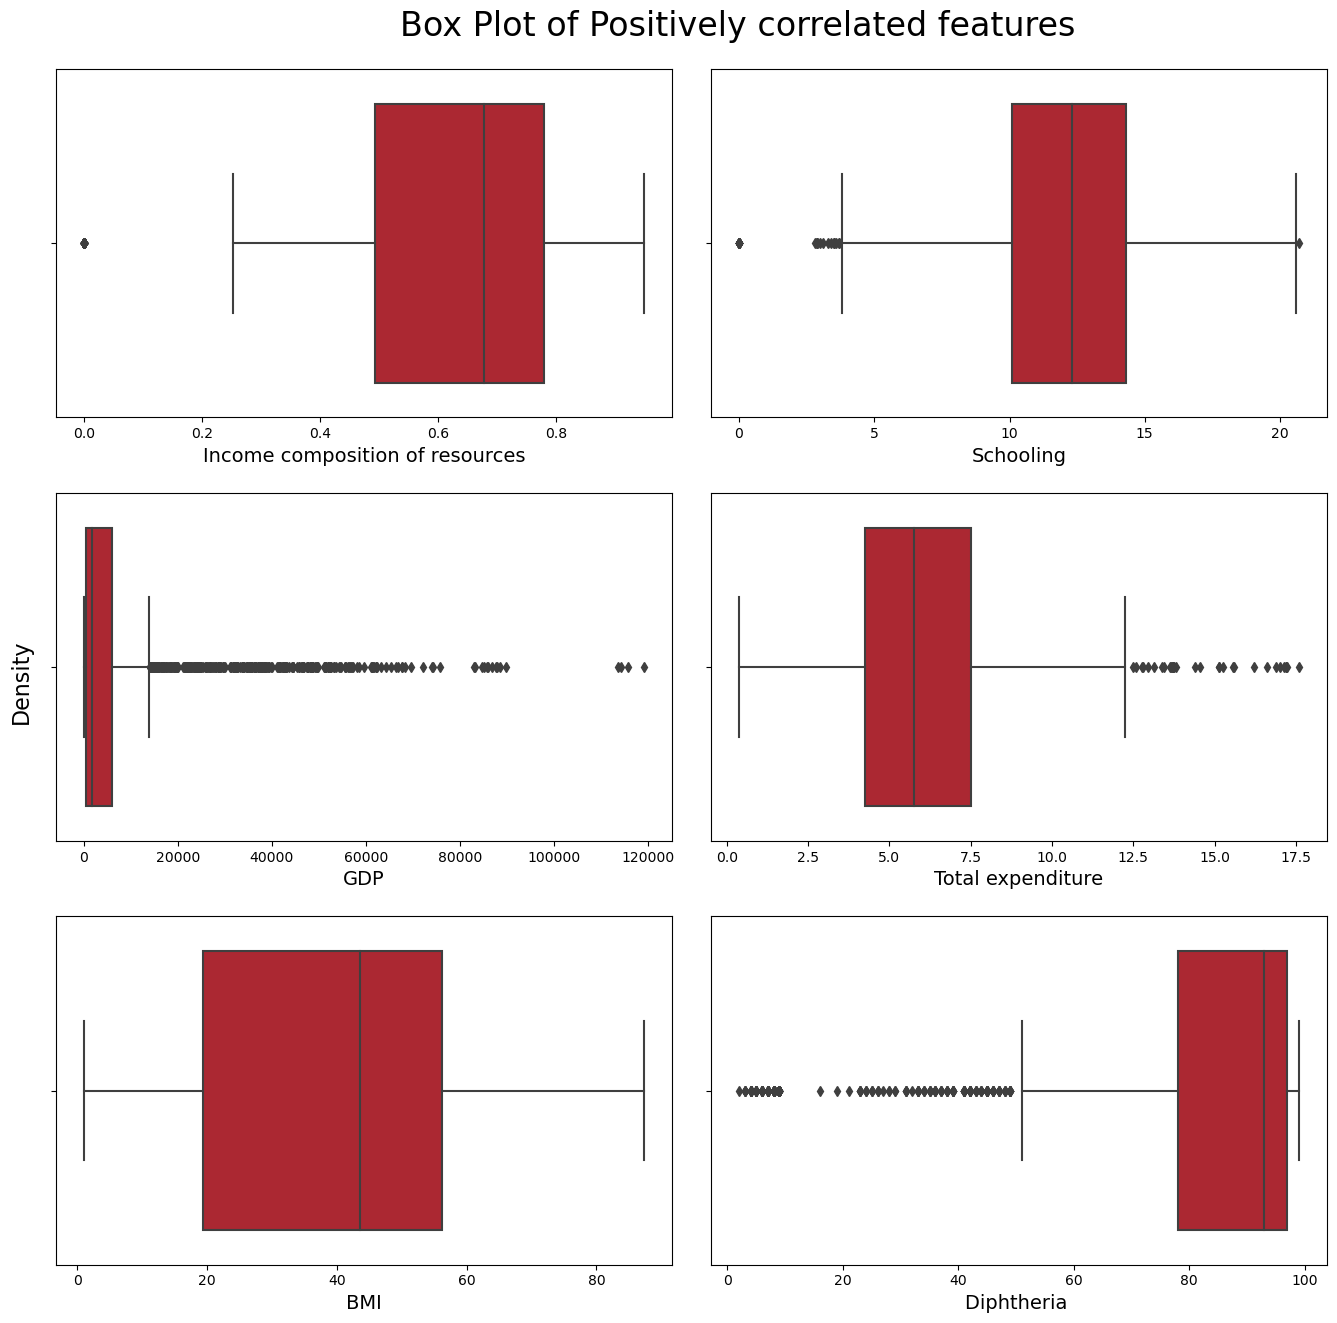

In [107]:
#Function to plot box plot
def plot_boxplot(df, columns, title = 'Box plot of features'):
      
    df = df.copy()
    
    rows = math.ceil(len(columns)/2)
    
    fig, ax = plt.subplots(rows, 2, figsize = (14,14))
    
    for i, column in enumerate(columns):
        ax = plt.subplot(rows, 2, i+1)
        
        sns.boxplot(x = df[column], 
                    data = df, 
                    ax = ax, 
                    color = colors[0])
    
        ax.set_xlabel(column)
        ax.set_ylabel('')
    
    fig.suptitle(title, 
                 fontsize=24,
                 x = 0.56);
    
    fig.text(0.04, 0.5, 
             'Density', 
             va='center', 
             rotation='vertical', 
             fontsize=16)
    
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])  
    
title = 'Box Plot of Positively correlated features'
plot_boxplot(df, pos_correlated_features, title)


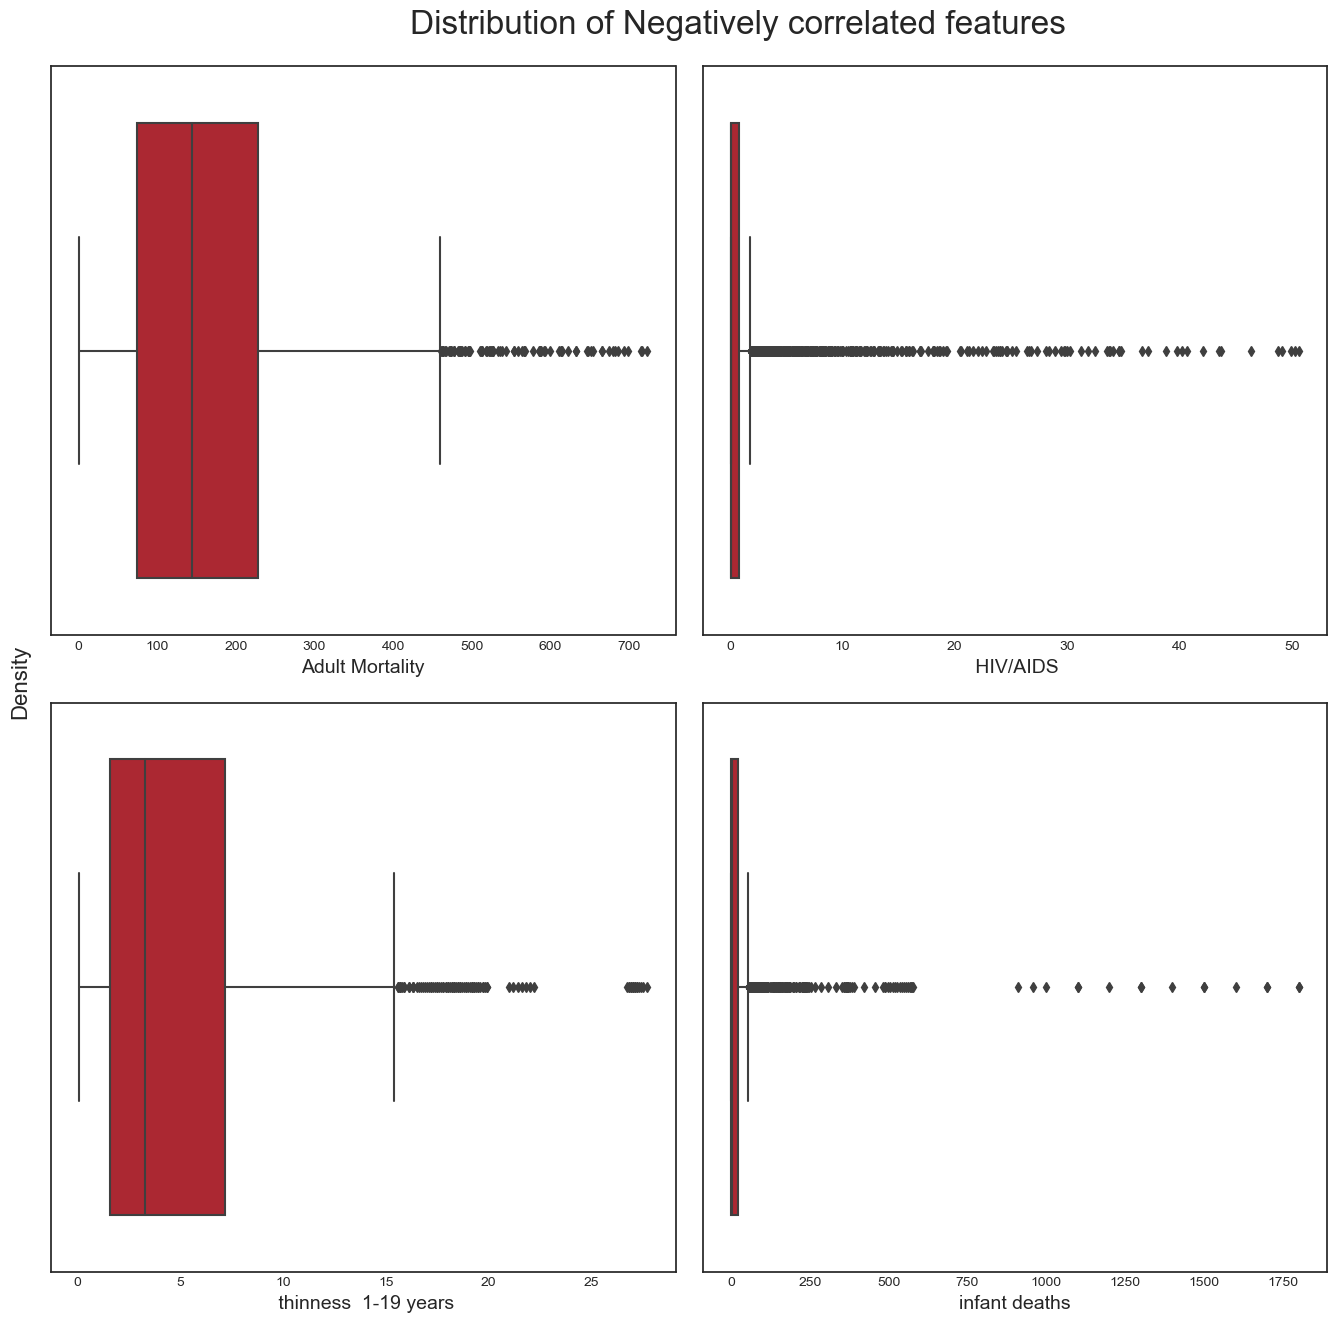

In [79]:
title = 'Distribution of Negatively correlated features'
plot_boxplot(df, neg_correlated_features, title)

In [108]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness 1-19 years                34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [109]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['Life expectancy']=imputer.fit_transform(df[['Life expectancy']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness 1-19 years']=imputer.fit_transform(df[[' thinness 1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [110]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness 1-19 years               0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [121]:
#Create a new dataset to work with
dff = pd.DataFrame({'country': df['Country'],
                        'life_expectancy': df['Life expectancy'],
                        'alcohol': df['Alcohol'],
                        'hepatitisB': df['Hepatitis B'],
                        'measles': df['Measles '],
                        'bmi': df[' BMI '],
                        'polio': df['Polio'],
                        'diphtheria': df['Diphtheria '],
                        'hiv': df[' HIV/AIDS'],
                        'total_expenditure': df['Total expenditure'],
                        'gdp': df['GDP'],
                        'total_expenditure': df['Total expenditure'],
                        'thinness_till19': df[' thinness 1-19 years'],
                        'inf_death': df['infant deaths'],
                        'school': df['Schooling'],
                        'population': df['Population'],
                        'status': df['Status']
                        })

# create the cut offs to split the population into 3 catagories
IQR = [dff.population.quantile(0.33), dff.population.quantile(0.67)]

# create new feature splitting the population into 3 sizes
dff['pop_size'] = 1
dff.loc[(dff.population < IQR[1]) & (dff.population > IQR[0]), 'pop_size'] = 2
dff.loc[dff.population >= IQR[1], 'pop_size'] = 3

# change 0 infant deaths to 1 
dff.loc[dff.inf_death == 0, 'inf_death'] = 1

#create a new column for the ratio of adult and infants death
dff['death_ratio'] = df['Adult Mortality'] / dff['inf_death']

# save as new csv file to for future refrence
refined_life_expectancy = dff.to_csv('refined_life_expectancy.csv')
 

In [56]:
dff_normal = pd.DataFrame(dff)

# Define a function for min-max normalization
def min_max_normalization(column):
    return (column - column.min()) / (column.max() - column.min())

# Apply min-max normalization to each numeric column in the DataFrame
numeric_columns = dff_normal.select_dtypes(include='number').columns
dff_normal[numeric_columns] = dff_normal[numeric_columns].apply(min_max_normalization)

# Display the normalized DataFrame
print(dff_normal)


          country  life_expectancy   alcohol  hepatitisB   measles       bmi  \
0     Afghanistan         0.544592  0.000000    0.653061  0.005439  0.209733   
1     Afghanistan         0.447818  0.000000    0.622449  0.002319  0.203940   
2     Afghanistan         0.447818  0.000000    0.642857  0.002027  0.198146   
3     Afghanistan         0.440228  0.000000    0.673469  0.013135  0.192352   
4     Afghanistan         0.434535  0.000000    0.683673  0.014200  0.187717   
...           ...              ...       ...         ...       ...       ...   
2933     Zimbabwe         0.151803  0.243561    0.683673  0.000146  0.302433   
2934     Zimbabwe         0.155598  0.226764    0.061224  0.004703  0.297798   
2935     Zimbabwe         0.161290  0.247480    0.734694  0.001433  0.293163   
2936     Zimbabwe         0.170778  0.095745    0.765306  0.002493  0.288528   
2937     Zimbabwe         0.184061  0.093505    0.795918  0.006989  0.283893   

         polio  diphtheria       hiv  t

In [57]:
#Class to replace outliers
class OutliersRemover(BaseEstimator, TransformerMixin):
    def __init__(self, baseline=1.5):
        self.baseline = baseline
        
    def fit(self, X, y=None):
        X = check_array(X, force_all_finite=False) #If non-array, transform into an array
        q1 = np.nanquantile(X, 0.25, axis=0) #First quartile
        q3 = np.nanquantile(X, 0.75, axis=0) #Third quartile
        IQR = q3 - q1
        self.lower_bound = q1 - (self.baseline * IQR)
        self.upper_bound = q3 + (self.baseline * IQR)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X, y=None):
        check_is_fitted(self)
        X = check_array(X, force_all_finite=False)
        assert self.n_features_in_ == X.shape[1]
        X_transformed = X.copy()
        X_transformed = np.where(((X_transformed < self.lower_bound) | (X_transformed > self.upper_bound)),
                                 np.nan, 
                                 X_transformed)
        
        
        return X_transformed #Returns an array

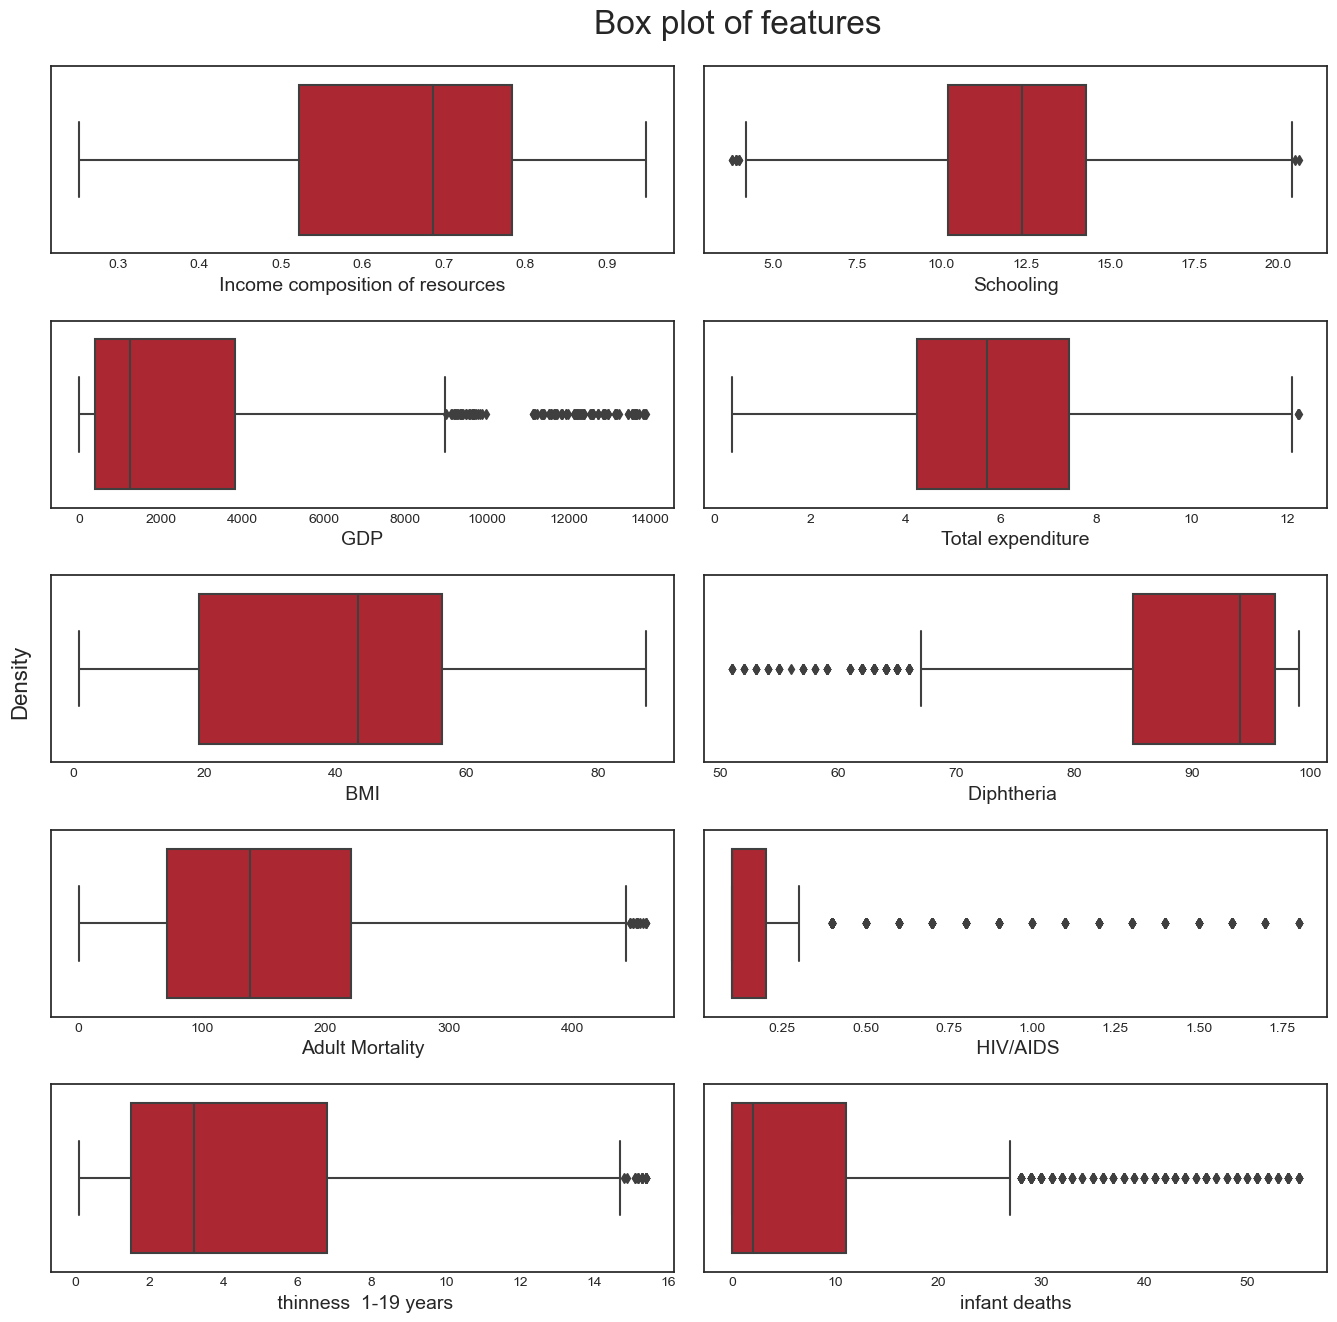

In [86]:
#Select the features
features = pos_correlated_features + neg_correlated_features

#Create a copy of the Dataframe with the selected features
df_temp = df[features].copy()

#Create, fit and transform the class OutliersRemover()
remove_outliers = OutliersRemover()
df_temp_without_outliers = remove_outliers.fit_transform(df_temp)

#Transform array back to a DataFrame
df_temp_transformed = pd.DataFrame(data = df_temp_without_outliers, columns = features)

#Plot boxplot
plot_boxplot(df_temp_transformed, features)

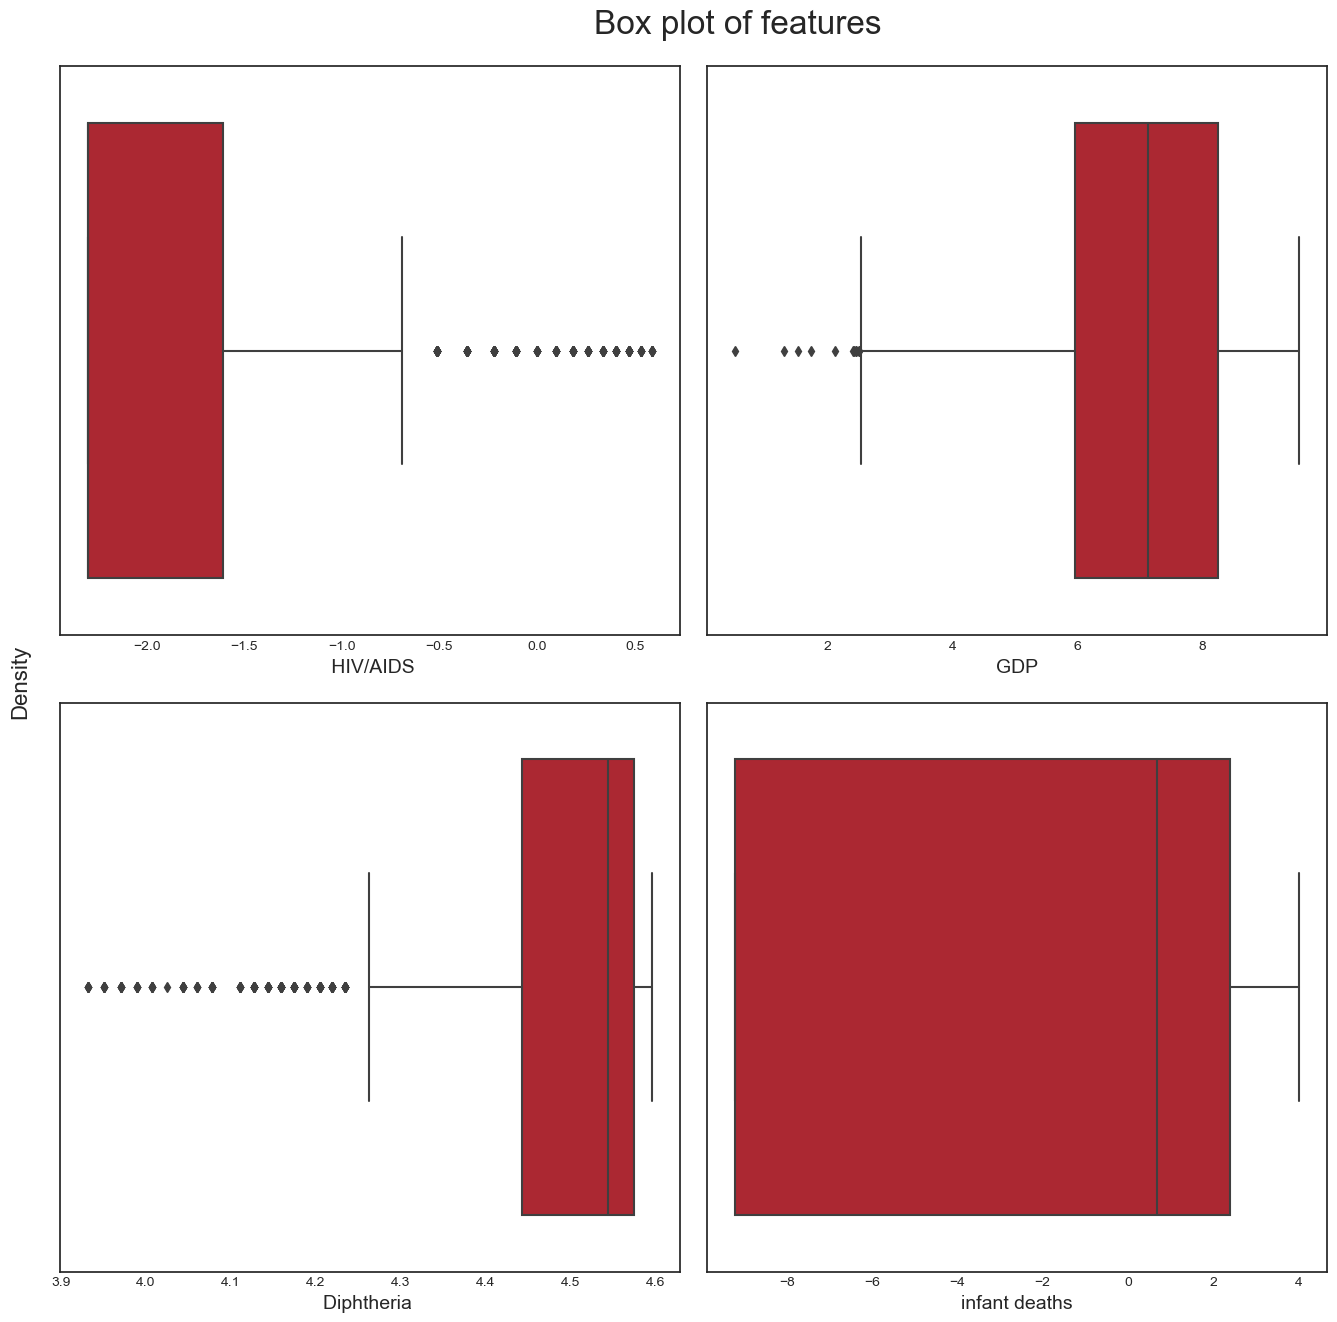

In [88]:
#Apply log transformation
columns_to_log = [' HIV/AIDS', 'GDP', 'Diphtheria ','infant deaths']

X_train_log = df_temp_transformed[columns_to_log].copy()

X_train_log= X_train_log.apply(lambda x: np.log(x + 10e-5))

plot_boxplot(X_train_log, columns_to_log)

In [87]:
dfff.head()


Unnamed: 0  life_expectancy  alcohol  hepatitisB  measles   bmi  polio  \
0           0             65.0     0.01        65.0     1154  19.1    6.0   
1           1             59.9     0.01        62.0      492  18.6   58.0   
2           2             59.9     0.01        64.0      430  18.1   62.0   
3           3             59.5     0.01        67.0     2787  17.6   67.0   
4           4             59.2     0.01        68.0     3013  17.2   68.0   

   diphtheria  hiv  total_expenditure         gdp  thinness_till19  inf_death  \
0        65.0  0.1               8.16  584.259210             17.2         62   
1        62.0  0.1               8.18  612.696514             17.5         64   
2        64.0  0.1               8.13  631.744976             17.7         66   
3        67.0  0.1               8.52  669.959000             17.9         69   
4        68.0  0.1               7.87   63.537231             18.2         71   

   school  population      status  pop_size  death_ratio  
0    10.1  33736494.0  Developing         3     4.241935  
1    10.0    327582.0  Developing         1     4.234375  
2     9.9  31731688.0  Developing         3     4.060606  
3     9.8   3696958.0  Developing         2     3.942029  
4     9.5   2978599.0  Developing         2     3.873239

In [123]:
dfff=pd.read_csv('refined_life_expectancy.csv')

In [182]:
class Preprocessing(): 
    def __init__(self):
        self.col_means = {}
        self.col_medians = {}
    
    def fit(self, data):
        cols_with_na = data.isna().sum()[data.isna().sum()>0].index.tolist()
        for ol in cols_with_na:
            self.col_means[col] = data.groupby('Country')[col].transform('mean')
            self.col_medians[col] = data[col].median()

    def transform(self, data):
        cols_with_na = data.isna().sum()[data.isna().sum()>0].index.tolist()
        for col in cols_with_na:
            mean_value = self.col_means[col]
            data.loc[:, col].fillna(mean_value, inplace=True)

        cols_with_na = data.isna().sum()[data.isna().sum()>0].index.tolist()
        for col in cols_with_na:
            median_value = self.col_medians[col]
            data.loc[:, col].fillna(median_value, inplace=True)
        
        data['status'].replace({'Developing' : 0, 'Developed' : 1,}, inplace=True)
        return data
    
    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [201]:
preprocesser = Preprocessing()
dff_normal = preprocesser.fit_transform(dff_normal)

In [202]:
dff_normal.drop(['country'], axis=1, inplace=True)
X = dff_normal.drop('life_expectancy', axis=1)
y = dff_normal['life_expectancy']

In [203]:
model = LinearRegression()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
best_rmse = float('inf')

std_scaler = StandardScaler()
poly_transformer = PolynomialFeatures(degree=2)


for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)
        poly_transformer.fit(X_train)
        poly_features = poly_transformer.transform(X_train)
        model.fit(poly_features, y_train)
        valid_poly_features = poly_transformer.transform(X_test)
        y_pred = model.predict(valid_poly_features)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            rmse = mean_squared_error(y_test, y_pred)
        if rmse < best_rmse:
            best_rmse = rmse
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Root Mean Squared Error (RMSE) on the test set: {best_rmse}")

Best test size: 0.15
Best random state: 313
Best R2 score: 0.8930868110826778
Root Mean Squared Error (RMSE) on the test set: 0.003401444641541816


In [204]:
model = KNeighborsRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
best_rmse = float('inf')
for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)
        poly_transformer.fit(X_train)
        poly_features = poly_transformer.transform(X_train)
        model.fit(poly_features, y_train)
        valid_poly_features = poly_transformer.transform(X_test)
        y_pred = model.predict(valid_poly_features)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_rmse = rmse 
        if rmse < best_rmse:
            best_rmse = rmse
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Best RMSE: {best_rmse}")

Best test size: 0.2
Best random state: 42
Best R2 score: 0.897227974086146
Best RMSE: 0.0032278661130600603


In [200]:
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

poly_transformer.fit(X_train)
poly_features = poly_transformer.transform(X_train)

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(poly_features, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
valid_poly_features = poly_transformer.transform(X_test)
y_pred = model.predict(valid_poly_features)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")
test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on test set: {test_rmse}")

Best R2 score: 0.9278256765215358
Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.9197413670004807
Root Mean Squared Error (RMSE) on test set: 2.7131742843807305


In [189]:
KNNmodel = KNeighborsRegressor(**best_params)
KNNmodel.fit(poly_features, y_train)

KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

In [190]:
y_pred = KNNmodel.predict(valid_poly_features)
r2_score(y_test, y_pred)

0.9302068532716506

In [150]:
X_final = std_scaler.fit_transform(X)
poly_transformer.fit(X_final)
final_poly_features = poly_transformer.transform(X_final)
y_final = KNNmodel.predict(final_poly_features)

In [199]:
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_final})

fig = px.scatter(comparison_df, x='Actual', y='Predicted', color='Actual')
fig.update_layout(
    title='Comparison of Actual vs. Predicted',
    xaxis_title='Actual',
    yaxis_title='Predicted'
)
fig.show()

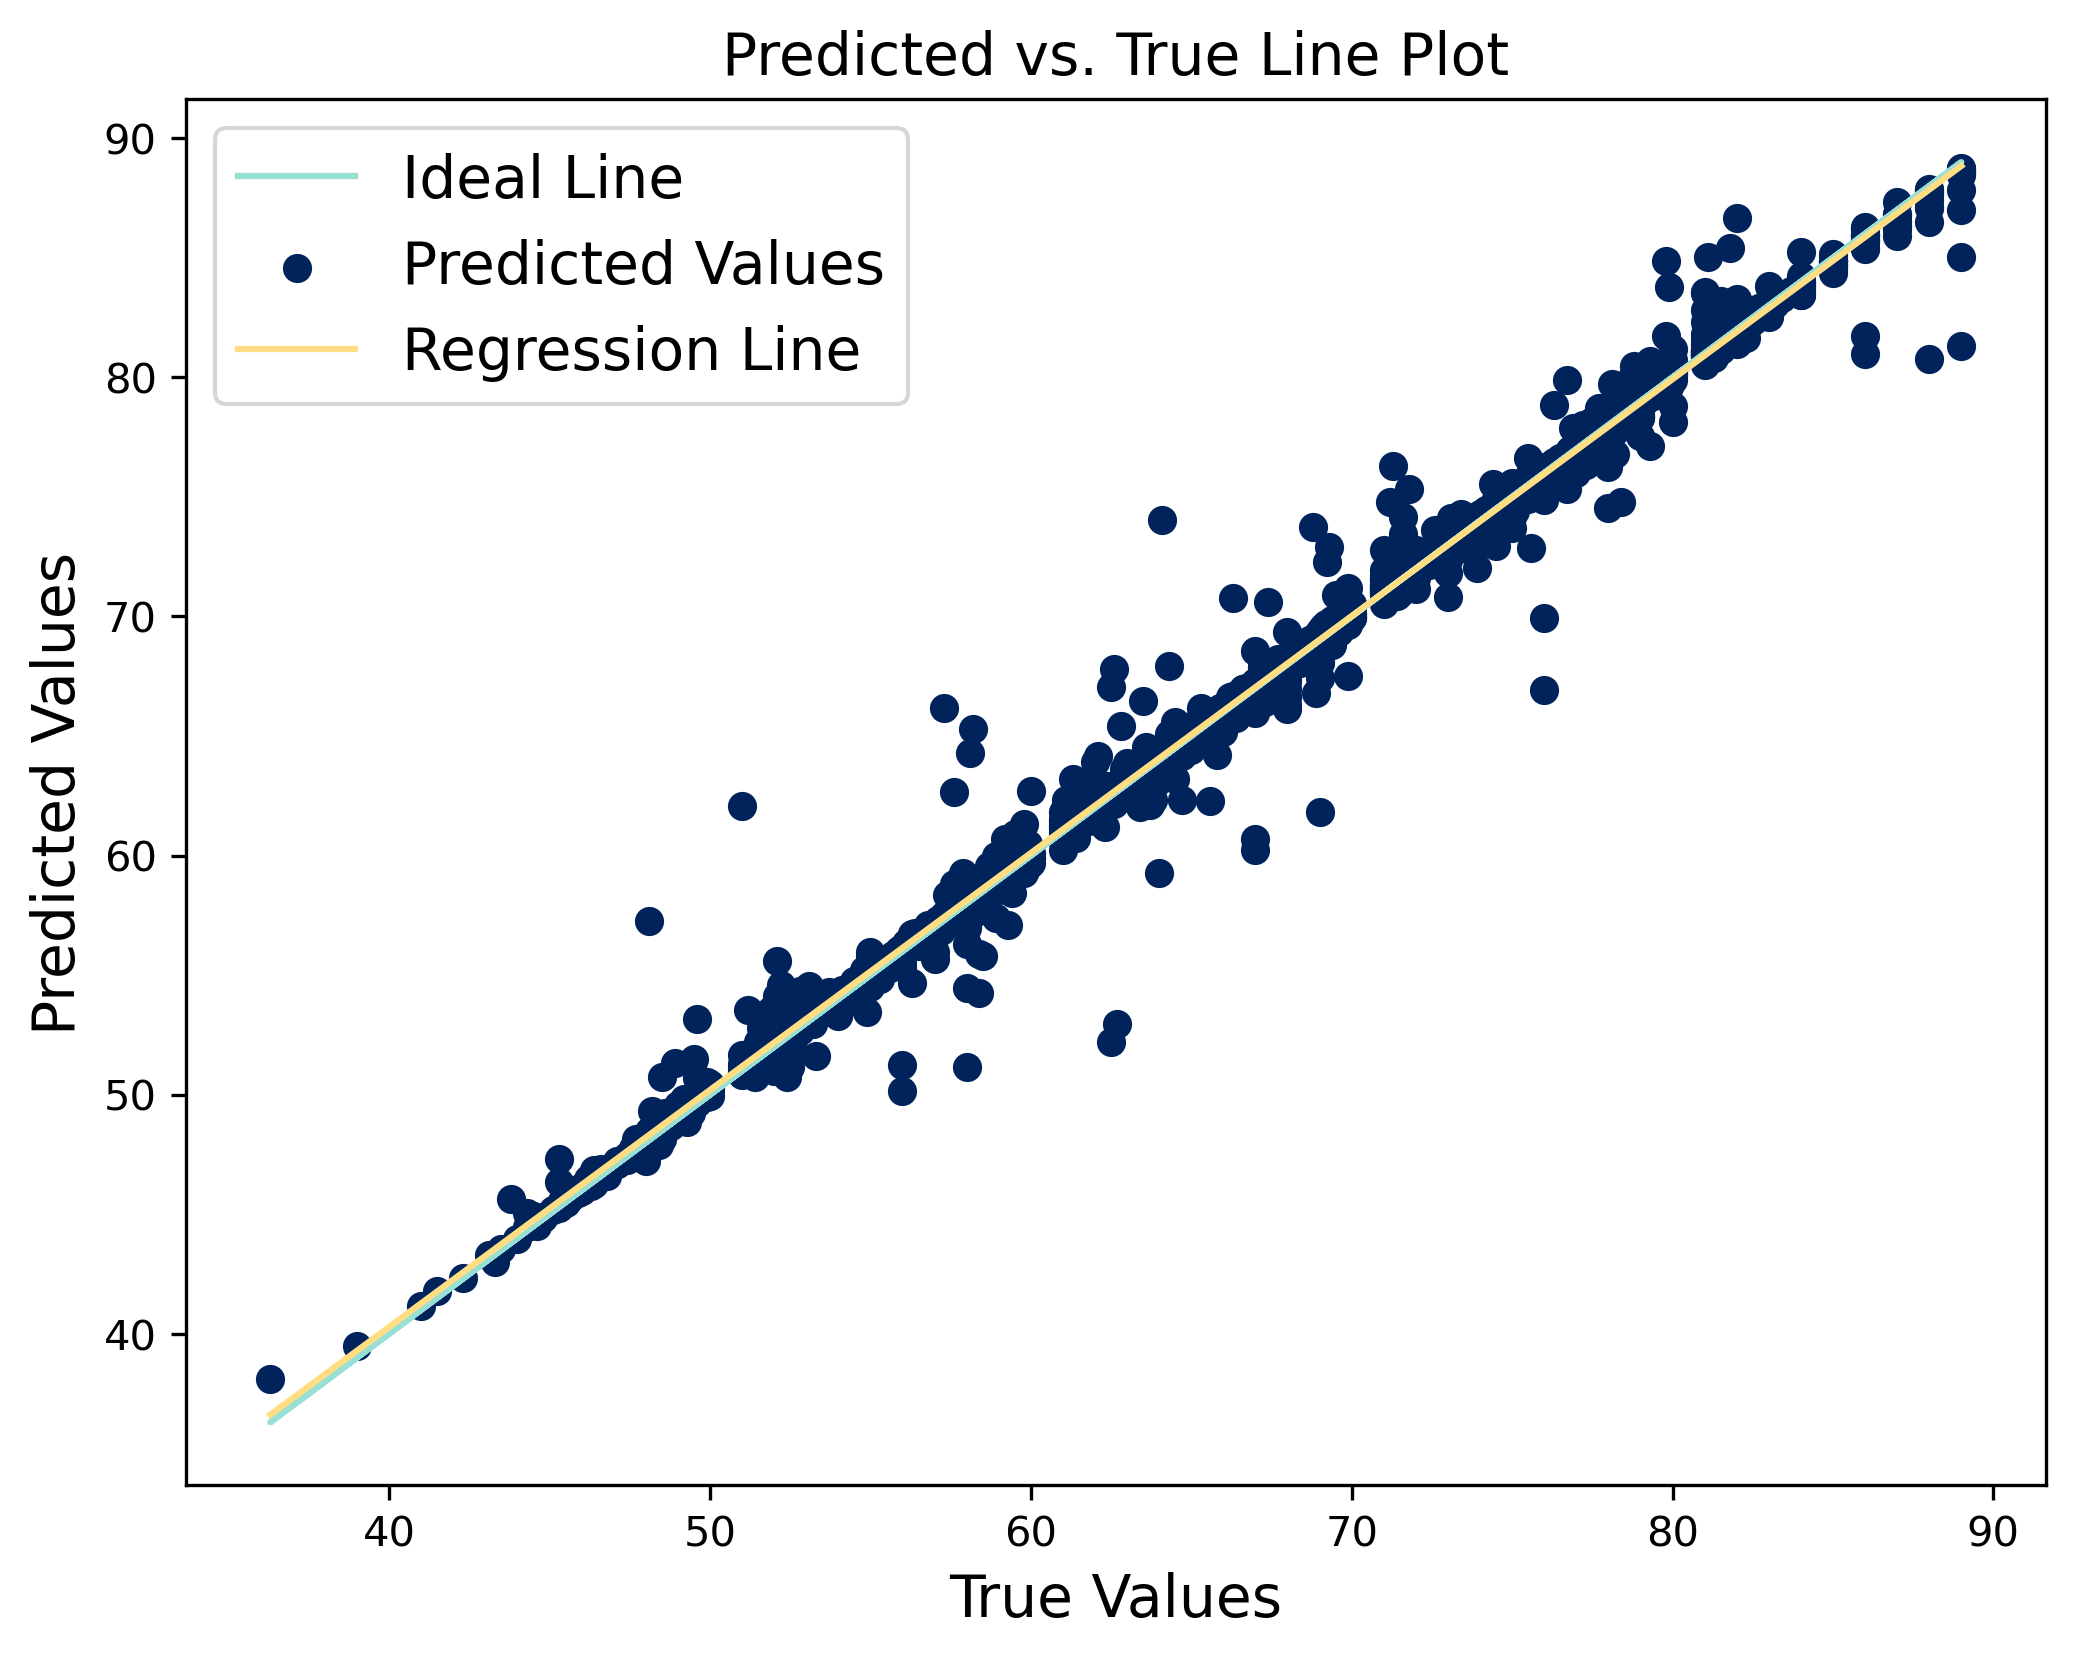

In [136]:
plt.figure(figsize=(8, 6),dpi=300)
plt.plot(y, y, color='#98DFD6', label='Ideal Line')
plt.scatter(y, y_final, color='#00235B', label='Predicted Values')
plt.plot(np.unique(y), np.poly1d(np.polyfit(y, y_final, 1))(np.unique(y)), color='#FFDD83', label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. True Line Plot')
plt.legend()
plt.show()

In [177]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# Define the function to optimize
def objective_function(learning_rate, n_estimators):
    # Convert hyperparameters to the appropriate types if needed
    learning_rate = float(learning_rate)
    n_estimators = int(n_estimators)

    # Create your model with the specified hyperparameters
    model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, random_state=42)

    # Evaluate the model using cross-validation and return the negative mean RMSE
    rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    return np.mean(rmse_scores)

# Define the search space for hyperparameters
param_space = {
    'learning_rate': (0.01, 0.1),
    'n_estimators': (50, 200),
}

# Create the BayesianOptimization object
bayesian_opt = BayesianOptimization(
    f=objective_function,
    pbounds=param_space,
    random_state=42,  # Set a seed for reproducibility
)

# Perform the optimization
bayesian_opt.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = bayesian_opt.max['params']
best_learning_rate = best_params['learning_rate']
best_n_estimators = best_params['n_estimators']

print(f"Best learning rate: {best_learning_rate}")
print(f"Best number of estimators: {best_n_estimators}")


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | -2.835    | 0.04371   | 192.6     |
| 2         | -2.73     | 0.07588   | 139.8     |
| 3         | -3.951    | 0.02404   | 73.4      |
| 4         | -3.377    | 0.01523   | 179.9     |
| 5         | -2.77     | 0.0641    | 156.2     |
| 6         | -2.642    | 0.09817   | 139.9     |
| 7         | -3.104    | 0.02914   | 140.6     |
| 8         | -3.006    | 0.03278   | 155.6     |
| 9         | -4.17     | 0.01      | 156.9     |
| 10        | -2.713    | 0.06086   | 193.1     |
| 11        | -2.829    | 0.04378   | 193.7     |
| 12        | -2.537    | 0.09771   | 194.4     |
| 13        | -2.939    | 0.03114   | 194.9     |
| 14        | -2.569    | 0.09002   | 194.4     |
| 15        | -2.695    | 0.06186   | 192.0     |
Best learning rate: 0.0977052022993711
Best number of estimators: 194.37225242309955


In [205]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from bayes_opt import BayesianOptimization

# Define the function to optimize
def objective_function(learning_rate, n_estimators):
    # Convert hyperparameters to the appropriate types if needed
    learning_rate = float(learning_rate)
    n_estimators = int(n_estimators)

    # Create your model with the specified hyperparameters
    model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, random_state=42)

    # Define a custom scoring function that returns R2
    custom_scorer = make_scorer(r2_score)

    # Evaluate the model using cross-validation and return the negative mean RMSE and mean R2
    rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=custom_scorer)

    # Calculate the mean RMSE and mean R2
    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    # Print the results for each iteration (optional)
    print(f"Learning rate: {learning_rate}, n_estimators: {n_estimators}, RMSE: {mean_rmse}, R2: {mean_r2}")

    return mean_rmse  # Optimize for negative mean RMSE

# Define the search space for hyperparameters
param_space = {
    'learning_rate': (0.01, 0.1),
    'n_estimators': (50, 200),
}

# Create the BayesianOptimization object
bayesian_opt = BayesianOptimization(
    f=objective_function,
    pbounds=param_space,
    random_state=42,  # Set a seed for reproducibility
)

# Perform the optimization
bayesian_opt.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters and the corresponding RMSE and R2
best_params = bayesian_opt.max['params']
best_learning_rate = best_params['learning_rate']
best_n_estimators = best_params['n_estimators']
best_rmse = -bayesian_opt.max['target']  # Convert back to positive RMSE
print(f"Best learning rate: {best_learning_rate}")
print(f"Best number of estimators: {best_n_estimators}")
print(f"Corresponding RMSE: {best_rmse}")



|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
Learning rate: 0.04370861069626263, n_estimators: 192, RMSE: -0.056502005278899335, R2: 0.9028923606565409
| 1         | -0.0565   | 0.04371   | 192.6     |
Learning rate: 0.07587945476302646, n_estimators: 139, RMSE: -0.05492806191345424, R2: 0.9081942210209821
| 2         | -0.05493  | 0.07588   | 139.8     |
Learning rate: 0.02404167763981929, n_estimators: 73, RMSE: -0.07522172142450878, R2: 0.82837582068684
| 3         | -0.07522  | 0.02404   | 73.4      |
Learning rate: 0.015227525095137952, n_estimators: 179, RMSE: -0.06503716150009325, R2: 0.871582012822197
| 4         | -0.06504  | 0.01523   | 179.9     |
Learning rate: 0.0641003510568888, n_estimators: 156, RMSE: -0.05546628390829396, R2: 0.9063841209435507
| 5         | -0.05547  | 0.0641    | 156.2     |
Learning rate: 0.02878008620604327, n_estimators: 124, RMSE: -0.06169597108652155, R2: 0.8843381094956857
| 6         | -0.